In [45]:
import pandas as pd
from textblob import TextBlob
from nltk.corpus import stopwords
import nltk
import re

In [46]:
# Download NLTK data (if not already downloaded)
#nltk.download("punkt")
#nltk.download("stopwords")

In [47]:
# Load the CSV dataset
data = pd.read_csv("./Data/Food_reviews/fitchai.csv")
data.head()

,Reviews
0,awesome taste
1,nothing
2,ok
3,taste is good
4,Totally tasteless


In [48]:
# Define the judging criteria
criteria = [
    "Taste of food",
    "Quality of food",
    "Quantity of food",
    "Location",
    "Accessibility",
    "Delivery Agent's behavior and time taken",
    "Packaging of food delivered",
    "How healthy the food is",
    "Presentation of the food",
    "Décor/ambience of the restaurant",
]

In [49]:
# Create a function to analyze sentiment
def analyze_sentiment(text):
    analysis = TextBlob(text)
    # Use polarity to determine sentiment (positive, neutral, negative)
    if analysis.sentiment.polarity > 0:
        return "positive"
    elif analysis.sentiment.polarity == 0:
        return "neutral"
    else:
        return "negative"

In [50]:
# Create a dictionary to store the results
results = {}

# Preprocess and analyze reviews for each criterion
for criterion in criteria:
    print(f"Analyzing reviews for {criterion}")
    
    # Preprocess reviews (remove special characters, convert to lowercase)
    data["cleaned_review"] = data["Reviews"].apply(lambda x: re.sub(r"[^a-zA-Z0-9\s]", "", x).lower())
    
    # Analyze sentiment of reviews for the current criterion
    data[criterion] = data["cleaned_review"].apply(analyze_sentiment)
    
    # Calculate the percentage of positive, neutral, and negative reviews
    sentiment_counts = data[criterion].value_counts(normalize=True) * 100
    
    # Store the results in the dictionary
    results[criterion] = {
        "Positive": sentiment_counts.get("positive", 0),
        "Neutral": sentiment_counts.get("neutral", 0),
        "Negative": sentiment_counts.get("negative", 0),
    }

Analyzing reviews for Taste of food
Analyzing reviews for Quality of food
Analyzing reviews for Quantity of food
Analyzing reviews for Location
Analyzing reviews for Accessibility
Analyzing reviews for Delivery Agent's behavior and time taken
Analyzing reviews for Packaging of food delivered
Analyzing reviews for How healthy the food is
Analyzing reviews for Presentation of the food
Analyzing reviews for Décor/ambience of the restaurant


In [51]:
data.head()

,Reviews,cleaned_review,Taste of food,Quality of food,Quantity of food,Location,Accessibility,Delivery Agent's behavior and time taken,Packaging of food delivered,How healthy the food is,Presentation of the food,Décor/ambience of the restaurant
0,awesome taste,awesome taste,positive,positive,positive,positive,positive,positive,positive,positive,positive,positive
1,nothing,nothing,neutral,neutral,neutral,neutral,neutral,neutral,neutral,neutral,neutral,neutral
2,ok,ok,positive,positive,positive,positive,positive,positive,positive,positive,positive,positive
3,taste is good,taste is good,positive,positive,positive,positive,positive,positive,positive,positive,positive,positive
4,Totally tasteless,totally tasteless,negative,negative,negative,negative,negative,negative,negative,negative,negative,negative


In [52]:
plot_dict = {}
for criterion, sentiment_counts in results.items():
    plot_dict.update({criterion: sentiment_counts})

print(plot_dict)

{'Taste of food': {'Positive': 74.19354838709677, 'Neutral': 12.903225806451612, 'Negative': 12.903225806451612}, 'Quality of food': {'Positive': 74.19354838709677, 'Neutral': 12.903225806451612, 'Negative': 12.903225806451612}, 'Quantity of food': {'Positive': 74.19354838709677, 'Neutral': 12.903225806451612, 'Negative': 12.903225806451612}, 'Location': {'Positive': 74.19354838709677, 'Neutral': 12.903225806451612, 'Negative': 12.903225806451612}, 'Accessibility': {'Positive': 74.19354838709677, 'Neutral': 12.903225806451612, 'Negative': 12.903225806451612}, "Delivery Agent's behavior and time taken": {'Positive': 74.19354838709677, 'Neutral': 12.903225806451612, 'Negative': 12.903225806451612}, 'Packaging of food delivered': {'Positive': 74.19354838709677, 'Neutral': 12.903225806451612, 'Negative': 12.903225806451612}, 'How healthy the food is': {'Positive': 74.19354838709677, 'Neutral': 12.903225806451612, 'Negative': 12.903225806451612}, 'Presentation of the food': {'Positive': 74.

In [61]:
import matplotlib.pyplot as plt
import numpy as np

def plotting(plot_dict):
    categories = list(plot_dict.keys())
    sentiments = ['Positive', 'Neutral', 'Negative']
    num_categories = len(categories)
    width = 0.2

    fig, ax = plt.subplots()

    for i, sentiment in enumerate(sentiments):
        x = np.arange(len(categories)) + i * width
        y = [plot_dict[category][sentiment] for category in categories]
        ax.bar(x, y, width, label=sentiment)

    ax.set_ylabel('Percentage (%)')
    ax.set_title('Sentiment Analysis by Category')
    ax.set_xticks(np.arange(len(categories)) + width * (len(sentiments) - 1) / 2)
    ax.set_xticklabels(categories, rotation=45, ha='right')  # Corrected x-axis tick labels
    ax.legend(title='Sentiments')

    plt.tight_layout()
    plt.show()
    plt.show()


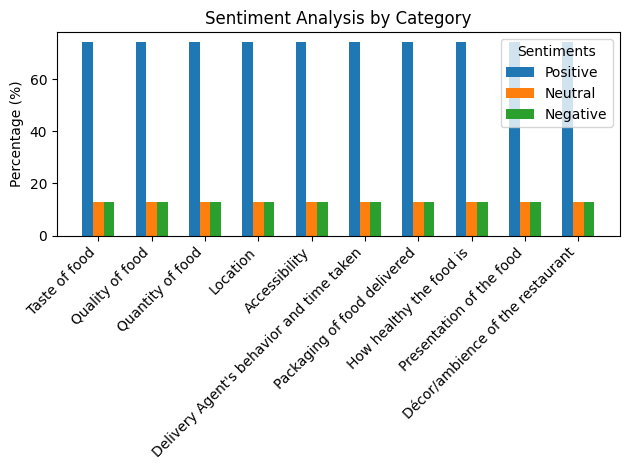

In [62]:
plotting(plot_dict)